# Quantum Phase Estimation with Qutrits

This code is written for an assignment as a part of my graduate coursework titled 'Introduction to Quantum Computation'. The problem is to find the eigenvalue of an unitary operator whose eigenvalue can be expressed as exp(2*pi*phi), where phi is 3^(-t) * b, where b is a positive integer. The algorithm used is Quantum Phase Estimation. Thee conventional phase estimation on qubit systems starts from the assumption that phi can be expressed as 2^(-t) * b, as our phi is 3^(-t)* b, we use qutrit system, where a qutrit can have three basis states. I intend to mimic qutrits using qubits and use IBM's qiskit tool for implementation 

In [1]:
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit

In [2]:
#Creation of Quantum Circuit
a1 = ClassicalRegister(1,'a')
b1 = ClassicalRegister(1,'b')
qreg = QuantumRegister(3)
circuit = QuantumCircuit(qreg,a1,b1)

In [3]:
#Initializing the state with equal superposition of all three basis states
circuit.initialize([1/np.sqrt(3),1/np.sqrt(3),0,1/np.sqrt(3)],[0,1])

#Initializing the eigenvector
circuit.initialize([1,0],2)
#circuit.initialize([0,1],2)

In [4]:
theta = 2 * np.pi / 3
#Initializing the unitary matrix
a = np.array([[np.exp(1j * theta),0],[0,np.exp(-1j * theta)]])

#Creating the controlled version of the gate
qc = QuantumCircuit(1)
qc.unitary(a, 0)
custom = qc.to_gate().control(1)
circuit.append(custom,[1,2])
circuit.append(custom,[0,2])

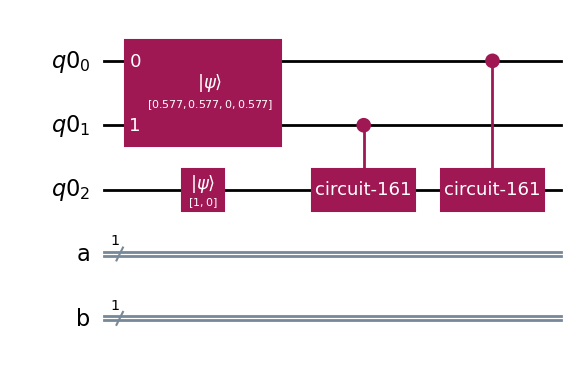

In [5]:
circuit.draw('mpl')

In [6]:
#Creating the Hadamard Gate

theta = 2 * np.pi / 3
b = (1/np.sqrt(3)) * np.array([[1,1,0,1],[1,np.exp(-1j * theta),0,np.exp(1j * theta)],[0,0,np.sqrt(3),0],[1,np.exp(1j * theta) ,0 , np.exp(-1j * theta)]])
print(b)
circuit.unitary(b,[0,1])

[[ 0.57735027+0.j   0.57735027+0.j   0.        +0.j   0.57735027+0.j ]
 [ 0.57735027+0.j  -0.28867513-0.5j  0.        +0.j  -0.28867513+0.5j]
 [ 0.        +0.j   0.        +0.j   1.        +0.j   0.        +0.j ]
 [ 0.57735027+0.j  -0.28867513+0.5j  0.        +0.j  -0.28867513-0.5j]]


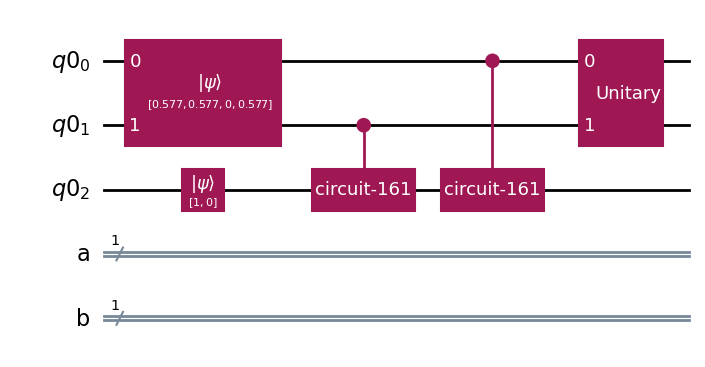

In [7]:
circuit.draw('mpl')

In [8]:
#Measuring the outcomes
circuit.measure(0,a1)
circuit.measure(1,b1)

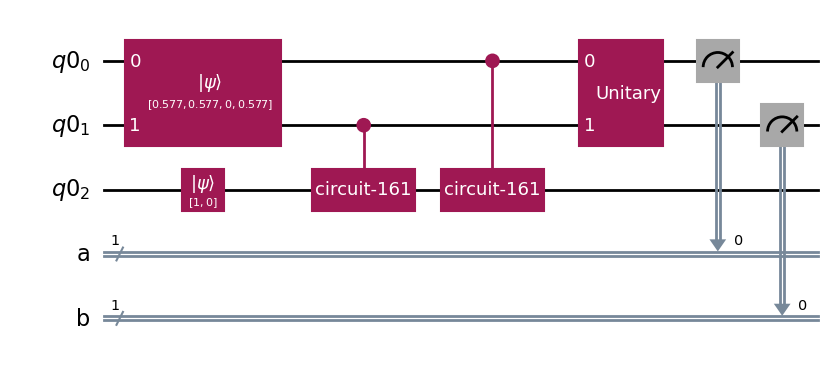

In [9]:
circuit.draw('mpl')

In [10]:
from qiskit.primitives import StatevectorSampler as Sampler
fin = Sampler().run([circuit])

In [11]:
bits = fin.result()[0].data

In [12]:
print(bits.b.get_counts())

{'0': 1024}


In [13]:
print(bits.a.get_counts())

{'1': 1024}


Output should be seen as 01, as qiskit has the convention of labelling qubits from down to top